# Logistic Regression

## Lead Scoring Case Study

### Problem Statement:
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

### Business Goal:
X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Step1: Importing and Reading Data

In [1]:
# surpressing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing libraries

# numpy and pandas 
import numpy as np
import pandas as pd 

# visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# reading the data
leads = pd.read_csv('Leads.csv')

### Step 2: Inspecting the Data

In [4]:
# checking the head of the dataset
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# checking the dimensions of the dataframe
leads.shape

(9240, 37)

In [6]:
# checking the type of each column
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
# checking the statistical aspects of the dataframe
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### Dealing with Missing values

In [8]:
# checking null values
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
# checking the percentage of null values in each column
round(100*(leads.isnull().sum()/len(leads)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

Now recall that there some categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value, so let us find out which are the columns. 

In [10]:
# Check value count of all the columns
for column in leads:
    print(leads[column].value_counts())
    print('---x---x---x---x---x--x--x--x---')

bd54406e-04fb-4109-99ba-b7eeb4897c1a    1
6b7a649d-69fc-4420-bdfb-f4088fbcaffa    1
d0787767-6c81-47f2-83b9-656c5b0000b1    1
442e197d-2fd2-4d68-91ca-5514fe1e36cc    1
570cefed-7494-4221-817a-22a8f8922c6b    1
                                       ..
cc7a323c-3201-455b-a0c0-e60de6857814    1
d12f7c8e-53f2-48ac-b9e4-e3b734efe393    1
4fd9474f-0ee7-44ed-adea-dc515e59e694    1
66458098-0ee7-46f0-8d26-de8441cde64b    1
61285ee1-10ab-4123-8ffc-00df0c886c0c    1
Name: Prospect ID, Length: 9240, dtype: int64
---x---x---x---x---x--x--x--x---
655360    1
604698    1
621242    1
619195    1
600768    1
         ..
593502    1
636228    1
648518    1
580937    1
608255    1
Name: Lead Number, Length: 9240, dtype: int64
---x---x---x---x---x--x--x--x---
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
---x---x---x---x---x--x--x--x---
Google               28

From the results above, the following columns have the level 'Select'
1. Specialization - valuecount 1942
2. How did you hear about X Education - valuecount 5043
3. Lead Profile - valuecount 4146
4. City - valuecount 2249

We will replace the values of 'Select' with null values

In [11]:
# replacing 'Select' with NaN
leads = leads.replace('Select', np.nan)

In [12]:
# checking the percentage of null values in each column after replacing 'Select' values with null values
round(100*(leads.isnull().sum()/len(leads)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [13]:
# dropping the columns that have more than 30% null values as it will not help during analysis (10 columns have >30%)
leads = leads.drop(['Specialization', 'How did you hear about X Education', 'Tags', 'Lead Quality', 'Lead Profile', 'City', 
                    'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis =1)

In [14]:
# checking the percentage of null values in each column again
round(100*(leads.isnull().sum()/len(leads)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

There are 7 columns namely - Lead Source, TotalVisits, Page Views Per Visit, Last Activity, Country, What is your current occupation and What matters most to you in choosing a course which have null values. We will check each column and decide if we should impute values or drop the columns.

In [15]:
# 1. Lead Source
# checking value counts for 'lead Source'
leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
Pay per Click Ads       1
NC_EDM                  1
blog                    1
youtubechannel          1
testone                 1
WeLearn                 1
welearnblog_Home        1
Name: Lead Source, dtype: int64

In [16]:
# From the results above we see that Google is the main lead source so we impute the null values to 'Google'
# We also see that there is a new value 'google' and we replace those values also to 'Google'
leads['Lead Source'] = leads['Lead Source'].replace(np.nan, 'Google')
leads['Lead Source'] = leads['Lead Source'].replace('google', 'Google')

In [17]:
# checking value counts for 'lead Source' again
leads['Lead Source'].value_counts()

Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
Pay per Click Ads       1
NC_EDM                  1
blog                    1
youtubechannel          1
testone                 1
WeLearn                 1
welearnblog_Home        1
Name: Lead Source, dtype: int64

In [18]:
# 2. Total Visits
# checking value counts for 'Total Visits'
leads['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
25.0        5
24.0        5
27.0        5
22.0        3
28.0        2
29.0        2
26.0        2
115.0       1
41.0        1
55.0        1
251.0       1
141.0       1
32.0        1
42.0        1
74.0        1
43.0        1
30.0        1
54.0        1
Name: TotalVisits, dtype: int64

In [19]:
# From the results above we see that 0.0 is having the maximum count so we impute the null values to '0.0'
leads['TotalVisits'] = leads['TotalVisits'].replace(np.nan, 0.0)

In [20]:
# checking value counts for 'Total Visits' again
leads['TotalVisits'].value_counts()

0.0      2326
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
25.0        5
24.0        5
27.0        5
22.0        3
28.0        2
29.0        2
26.0        2
115.0       1
41.0        1
55.0        1
251.0       1
141.0       1
32.0        1
42.0        1
74.0        1
43.0        1
30.0        1
54.0        1
Name: TotalVisits, dtype: int64

In [21]:
# 3. Page Views Per Visit
# checking value counts for 'Page Views Per Visit'
leads['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
2.13       1
4.40       1
6.67       1
8.33       1
2.45       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [22]:
# From the results above we see that 0.00 is having the maximum count so we impute the null values to '0.00'
leads['Page Views Per Visit'] = leads['Page Views Per Visit'].replace(np.nan, 0.0)

In [23]:
# checking value counts for 'Page Views Per Visit' again
leads['Page Views Per Visit'].value_counts()

0.00    2326
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
2.13       1
4.40       1
6.67       1
8.33       1
2.45       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [24]:
# 4. Last Activity
# checking value counts for 'Last Activity'
leads['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [25]:
# From the results above we see that Email Opened is having the maximum count so we impute the null values to 'Email Opened'
leads['Last Activity'] = leads['Last Activity'].replace(np.nan, 'Email Opened')

In [26]:
# checking value counts for 'Last Activity' again
leads['Last Activity'].value_counts()

Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [27]:
# 5. Country
# checking value counts for 'Country'
leads['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Canada                     4
Nigeria                    4
South Africa               4
Germany                    4
Kuwait                     4
Sweden                     3
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Ghana                      2
China                      2
Netherlands                2
Philippines                2
Belgium                    2
Malaysia                   1
Sri Lanka                  1
Switzerland                1
Vietnam                    1
Denmark                    1
Liberia                    1
Indonesia     

In [28]:
# Since the values above are skewed it is safe to say that the column can be dropped since it won't help us in analysis
leads = leads.drop(['Country'], axis=1)

In [29]:
# 6. What is your current occupation 
# checking value counts for 'What is your current occupation'
leads['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [30]:
# Since we can't find a suitable value for the null values, we will add a new value for the null values
leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'Not Provided')

In [31]:
# checking value counts for 'What is your current occupation' again
leads['What is your current occupation'].value_counts()

Unemployed              5600
Not Provided            2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [32]:
# 7. What matters most to you in choosing a course 
# checking value counts for 'What matters most to you in choosing a course'
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [33]:
# Since the values above are skewed it is safe to say that the column can be dropped since it won't help us in analysis
leads = leads.drop(['What matters most to you in choosing a course'], axis=1)

In [34]:
# checking the percentage of null values in each column again
round(100*(leads.isnull().sum()/len(leads)),2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content       

All the columns do not have null values. We can go ahead with the dataset

In [35]:
# Check value count of all the columns again
for column in leads:
    print(leads[column].value_counts())
    print('---x---x---x---x---x--x--x--x---')

bd54406e-04fb-4109-99ba-b7eeb4897c1a    1
6b7a649d-69fc-4420-bdfb-f4088fbcaffa    1
d0787767-6c81-47f2-83b9-656c5b0000b1    1
442e197d-2fd2-4d68-91ca-5514fe1e36cc    1
570cefed-7494-4221-817a-22a8f8922c6b    1
                                       ..
cc7a323c-3201-455b-a0c0-e60de6857814    1
d12f7c8e-53f2-48ac-b9e4-e3b734efe393    1
4fd9474f-0ee7-44ed-adea-dc515e59e694    1
66458098-0ee7-46f0-8d26-de8441cde64b    1
61285ee1-10ab-4123-8ffc-00df0c886c0c    1
Name: Prospect ID, Length: 9240, dtype: int64
---x---x---x---x---x--x--x--x---
655360    1
604698    1
621242    1
619195    1
600768    1
         ..
593502    1
636228    1
648518    1
580937    1
608255    1
Name: Lead Number, Length: 9240, dtype: int64
---x---x---x---x---x--x--x--x---
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
---x---x---x---x---x--x--x--x---
Google               29

From the value counts above we notice that there are some columns in which one value was majorily present. 

The columns are - Do Not Call, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content and I agree to pay the amount through cheque. 

Since all of the values for these variables are No, it is best to drop these columns as they won't help with our analysis.

In [36]:
# dropping the columns which have 'No' as the majority
leads = leads.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
                   'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',
                   'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis =1)

In [37]:
# looking at the dataset again
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,Modified


In [38]:
# we drop the variables 'Prospect ID' and 'Lead Number' as they won't be useful for our analysis
leads = leads.drop(['Prospect ID', 'Lead Number'], axis =1)

In [39]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,Modified


In [40]:
leads.shape

(9240, 11)

#### Outlier Treatment

In [41]:
# checking outliers at 25%,50%,75%,90%,95%, 99%
leads.describe(percentiles=[.25,.50,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.394156,487.698268,2.327787
std,0.486714,4.836682,548.021466,2.164258
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
90%,1.000000,7.000000,1380.000000,5.000000
95%,1.000000,10.000000,1562.000000,6.000000
99%,1.000000,17.000000,1840.610000,9.000000


We can see that there are outliers in the columns TotalVisits and Page Views Per Visit.

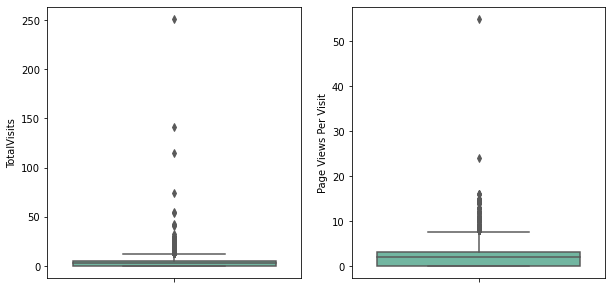

In [42]:
# checking the outliers for the numerical columns of TotalVisits and Page Views Per Visit
plt.figure(figsize = (10, 5))
plt.subplot(1,2,1)
sns.boxplot(y = 'TotalVisits', palette = 'Set2', data = leads)
plt.subplot(1,2,2)
sns.boxplot(y = 'Page Views Per Visit', palette = 'Set2', data = leads)
plt.show()

In [43]:
# Removing values beyond 99% for Total Visits
total_visits = leads['TotalVisits'].quantile(0.99)
leads = leads[leads["TotalVisits"] < total_visits]

In [44]:
# Removing values beyond 99% for Total Visits
page_views = leads['Page Views Per Visit'].quantile(0.99)
leads = leads[leads["Page Views Per Visit"] < page_views]

In [45]:
# checking outliers at 25%,50%,75%,90%,95% 99% again
leads.describe(percentiles=[.25,.50,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9029.000000,9029.000000,9029.000000,9029.000000
mean,0.385092,3.041644,483.133016,2.196036
std,0.486644,2.826553,547.420675,1.843445
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,7.000000,0.000000
50%,0.000000,3.000000,245.000000,2.000000
75%,1.000000,4.000000,929.000000,3.000000
90%,1.000000,7.000000,1378.000000,5.000000
95%,1.000000,8.000000,1558.000000,6.000000
99%,1.000000,13.000000,1839.720000,7.000000


#### Performing EDA

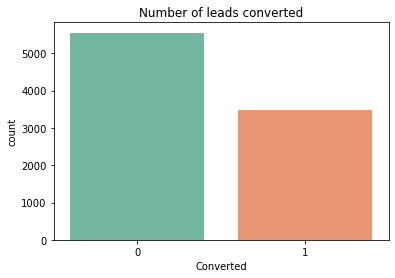

In [46]:
sns.countplot(leads['Converted'], palette="Set2")
plt.title('Number of leads converted')
plt.show()

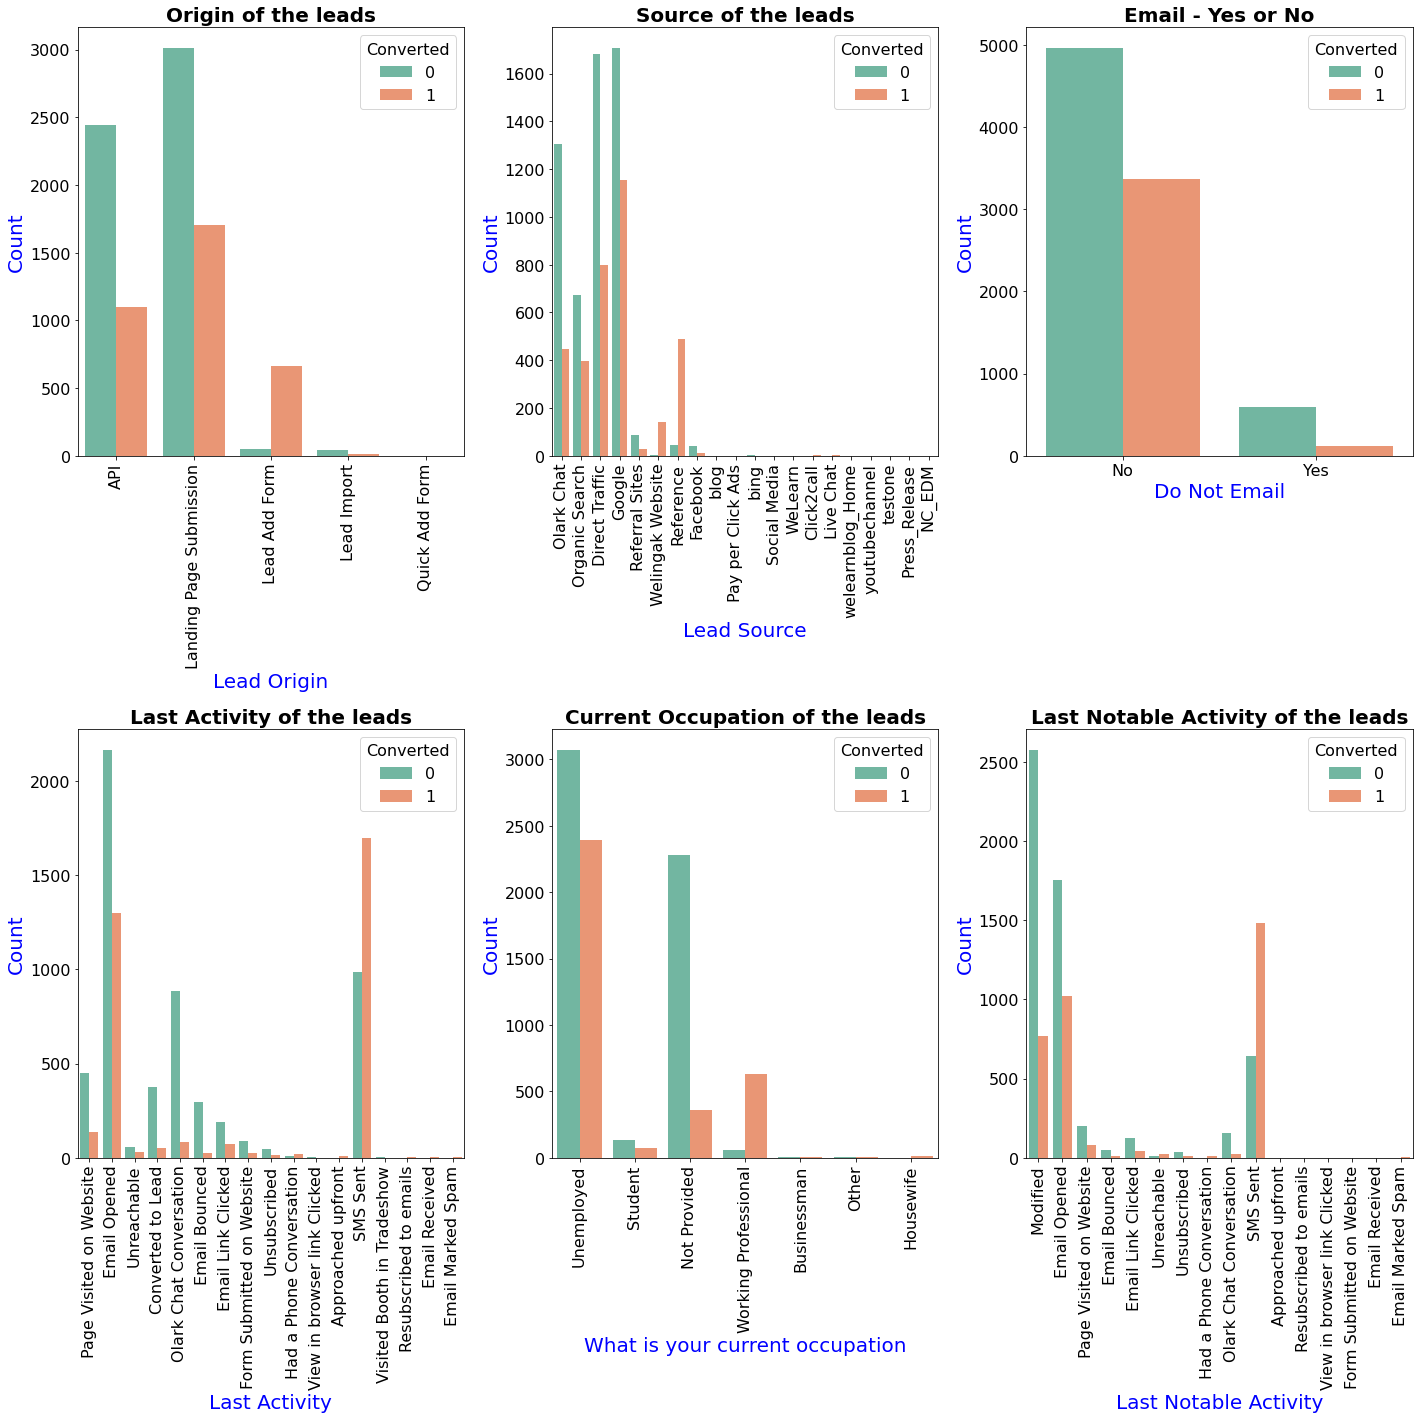

In [47]:
# checking the categorical variables
fig= plt.figure(figsize = (20,20))
plt.rc('font', size=16)

plt.subplot(2,3,1)
sns.countplot(x = 'Lead Origin', palette = 'Set2', data = leads, hue = 'Converted')
plt.title('Origin of the leads', fontsize = 20, fontweight = 'bold')
plt.xlabel('Lead Origin', fontsize=20, color = 'blue')
plt.ylabel('Count', fontsize=20, color = 'blue')
plt.xticks(rotation=90)
plt.legend(loc='upper right', title = 'Converted')


plt.subplot(2,3,2)
sns.countplot(x = 'Lead Source', palette = 'Set2', data = leads, hue = 'Converted')
plt.title('Source of the leads', fontsize = 20, fontweight = 'bold')
plt.xlabel('Lead Source', fontsize=20, color = 'blue')
plt.ylabel('Count', fontsize=20, color = 'blue')
plt.xticks(rotation=90)
plt.legend(loc='upper right', title = 'Converted')

plt.subplot(2,3,3)
sns.countplot(x = 'Do Not Email', palette = 'Set2', data = leads, hue = 'Converted')
plt.title('Email - Yes or No', fontsize = 20, fontweight = 'bold')
plt.xlabel('Do Not Email', fontsize=20, color = 'blue')
plt.ylabel('Count', fontsize=20, color = 'blue')
plt.legend(loc='upper right', title = 'Converted')

plt.subplot(2,3,4)
sns.countplot(x = 'Last Activity', palette = 'Set2', data = leads, hue = 'Converted')
plt.title('Last Activity of the leads', fontsize = 20, fontweight = 'bold')
plt.xlabel('Last Activity', fontsize=20, color = 'blue')
plt.ylabel('Count', fontsize=20, color = 'blue')
plt.xticks(rotation=90)
plt.legend(loc='upper right', title = 'Converted')

plt.subplot(2,3,5)
sns.countplot(x = 'What is your current occupation', palette = 'Set2', data = leads, hue = 'Converted')
plt.title('Current Occupation of the leads', fontsize = 20, fontweight = 'bold')
plt.xlabel('What is your current occupation', fontsize=20, color = 'blue')
plt.ylabel('Count', fontsize=20, color = 'blue')
plt.xticks(rotation=90)
plt.legend(loc='upper right', title = 'Converted')

plt.subplot(2,3,6)
sns.countplot(x = 'Last Notable Activity', palette = 'Set2', data = leads, hue = 'Converted')
plt.title('Last Notable Activity of the leads', fontsize = 20, fontweight = 'bold')
plt.xlabel('Last Notable Activity', fontsize=20, color = 'blue')
plt.ylabel('Count', fontsize=20, color = 'blue')
plt.xticks(rotation=90)
plt.legend(loc='upper right', title = 'Converted')

fig.tight_layout()
plt.show()

1. From Lead Origin we see that maximum conversion had happened from Landing Page Submission
2. From Lead Source we see that Google is the main source of conversion
3. From Last Activity and Last Notable Activity we see that 'SMS Sent' has the highest conversion
4. From What is your current occupation we see that the majority conversion has happened from 'Unemployed'

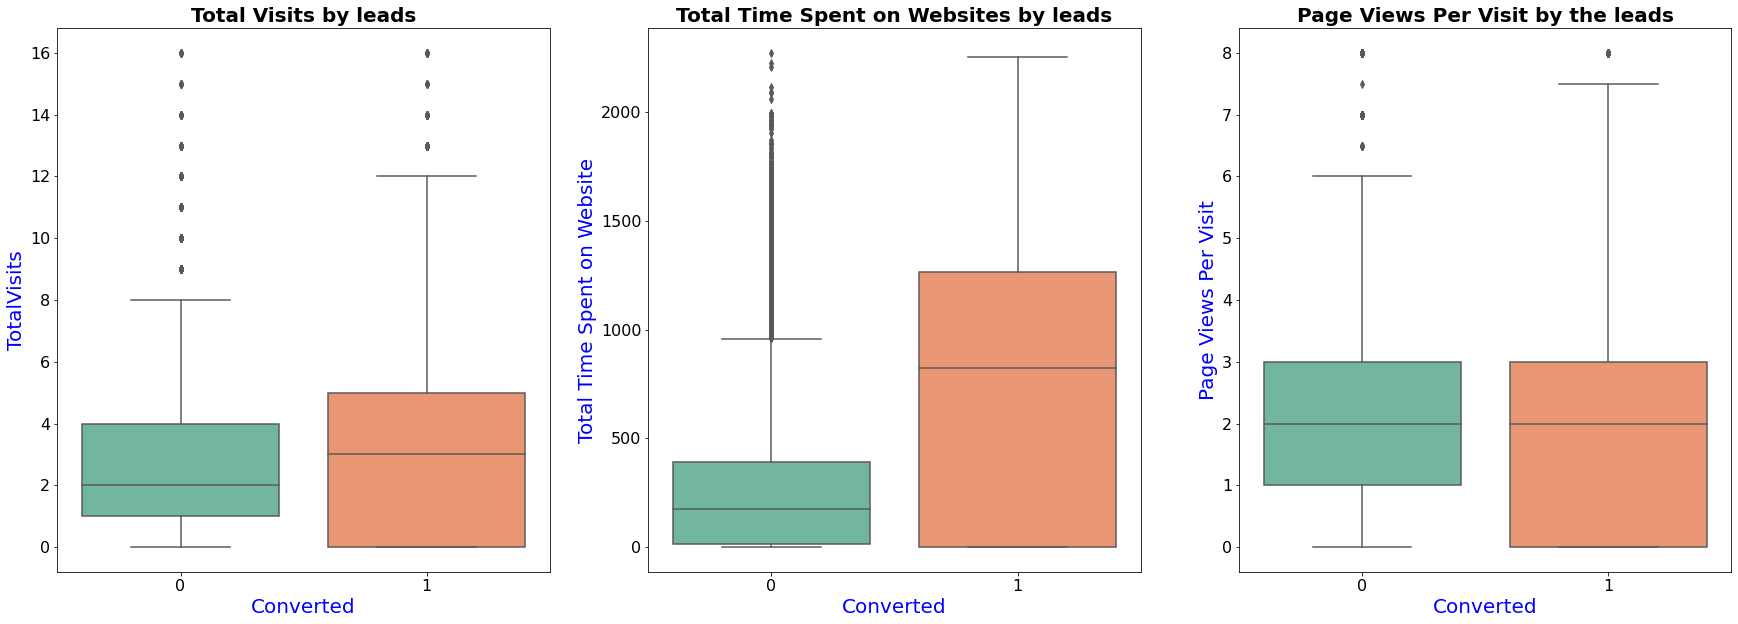

In [48]:
# checking the numerical variables
plt.figure(figsize = (30, 10))

plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x='Converted',  palette = 'Set2', data = leads)
plt.title('Total Visits by leads', fontsize = 20, fontweight = 'bold')
plt.xlabel('Converted', fontsize=20, color = 'blue')
plt.ylabel('TotalVisits', fontsize=20, color = 'blue')

plt.subplot(1,3,2)
sns.boxplot(y = 'Total Time Spent on Website', x='Converted', palette = 'Set2', data = leads)
plt.title('Total Time Spent on Websites by leads', fontsize = 20, fontweight = 'bold')
plt.xlabel('Converted', fontsize=20, color = 'blue')
plt.ylabel('Total Time Spent on Website', fontsize=20, color = 'blue')

plt.subplot(1,3,3)
sns.boxplot(y = 'Page Views Per Visit', x='Converted', palette = 'Set2', data = leads)
plt.title('Page Views Per Visit by the leads', fontsize = 20, fontweight = 'bold')
plt.xlabel('Converted', fontsize=20, color = 'blue')
plt.ylabel('Page Views Per Visit', fontsize=20, color = 'blue')

fig.tight_layout()
plt.show()

From the above graphs when the count of total visits, total time spent on websites and page views per visit are more, the conversion rate are also more.

### Step 3: Data Preparation

#### Converting some binary variables (Yes/No) to 0/1

In [49]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9029 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9029 non-null   object 
 1   Lead Source                             9029 non-null   object 
 2   Do Not Email                            9029 non-null   object 
 3   Converted                               9029 non-null   int64  
 4   TotalVisits                             9029 non-null   float64
 5   Total Time Spent on Website             9029 non-null   int64  
 6   Page Views Per Visit                    9029 non-null   float64
 7   Last Activity                           9029 non-null   object 
 8   What is your current occupation         9029 non-null   object 
 9   A free copy of Mastering The Interview  9029 non-null   object 
 10  Last Notable Activity                   9029 non-null   obje

In [50]:
# List of variables to map
varlist = ['Do Not Email', 'A free copy of Mastering The Interview']

#Defining the map function
def binary_map(x):
    return x.map({'Yes' : 1, 'No' : 0})

#Applying the function to the dataset
leads[varlist] = leads[varlist].apply(binary_map)

In [51]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Unemployed,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Student,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Unemployed,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,Modified


#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [52]:
# creating dummy variables for categorical variables and dropping the first one
dummy1 = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Last Activity', 'What is your current occupation',
                               'Last Notable Activity']], drop_first = True)

In [53]:
# adding the results to the main dataset
leads = pd.concat([leads, dummy1], axis =1)

In [54]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Unemployed,0,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Student,1,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Unemployed,0,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,...,0,0,1,0,0,0,0,0,0,0


In [55]:
# We have created dummies for the below variables, so we can drop them
leads = leads.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'What is your current occupation','Last Notable Activity'], 1)

In [56]:
leads.shape

(9029, 66)

In [57]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9029 entries, 0 to 9239
Data columns (total 66 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9029 non-null   int64  
 1   Converted                                             9029 non-null   int64  
 2   TotalVisits                                           9029 non-null   float64
 3   Total Time Spent on Website                           9029 non-null   int64  
 4   Page Views Per Visit                                  9029 non-null   float64
 5   A free copy of Mastering The Interview                9029 non-null   int64  
 6   Lead Origin_Landing Page Submission                   9029 non-null   uint8  
 7   Lead Origin_Lead Add Form                             9029 non-null   uint8  
 8   Lead Origin_Lead Import                               9029

### Step 4: Test-Train Split

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
# Putting feature variable to X
X = leads.drop(['Converted'], axis =1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [60]:
# Putting response variable to y
y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [61]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [62]:
#looking all the X, y train and test sets
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

X_train: (6320, 65)
X_test: (2709, 65)
y_train: (6320,)
y_test: (2709,)


### Step 5: Feature Scaling

In [63]:
from sklearn.preprocessing import MinMaxScaler

In [64]:
scaler = MinMaxScaler()

In [65]:
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

In [66]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
5493,0,0.1250,0.042254,0.250,1,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
8064,0,0.1875,0.041373,0.375,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4716,1,0.1875,0.099032,0.375,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9117,0,0.0000,0.000000,0.000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2402,0,0.3750,0.381162,0.250,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
# checking the conversion rate
converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
converted

38.50924797873519

Current Conversion Rate is 38.5%

### Step 6: Looking at Correlations

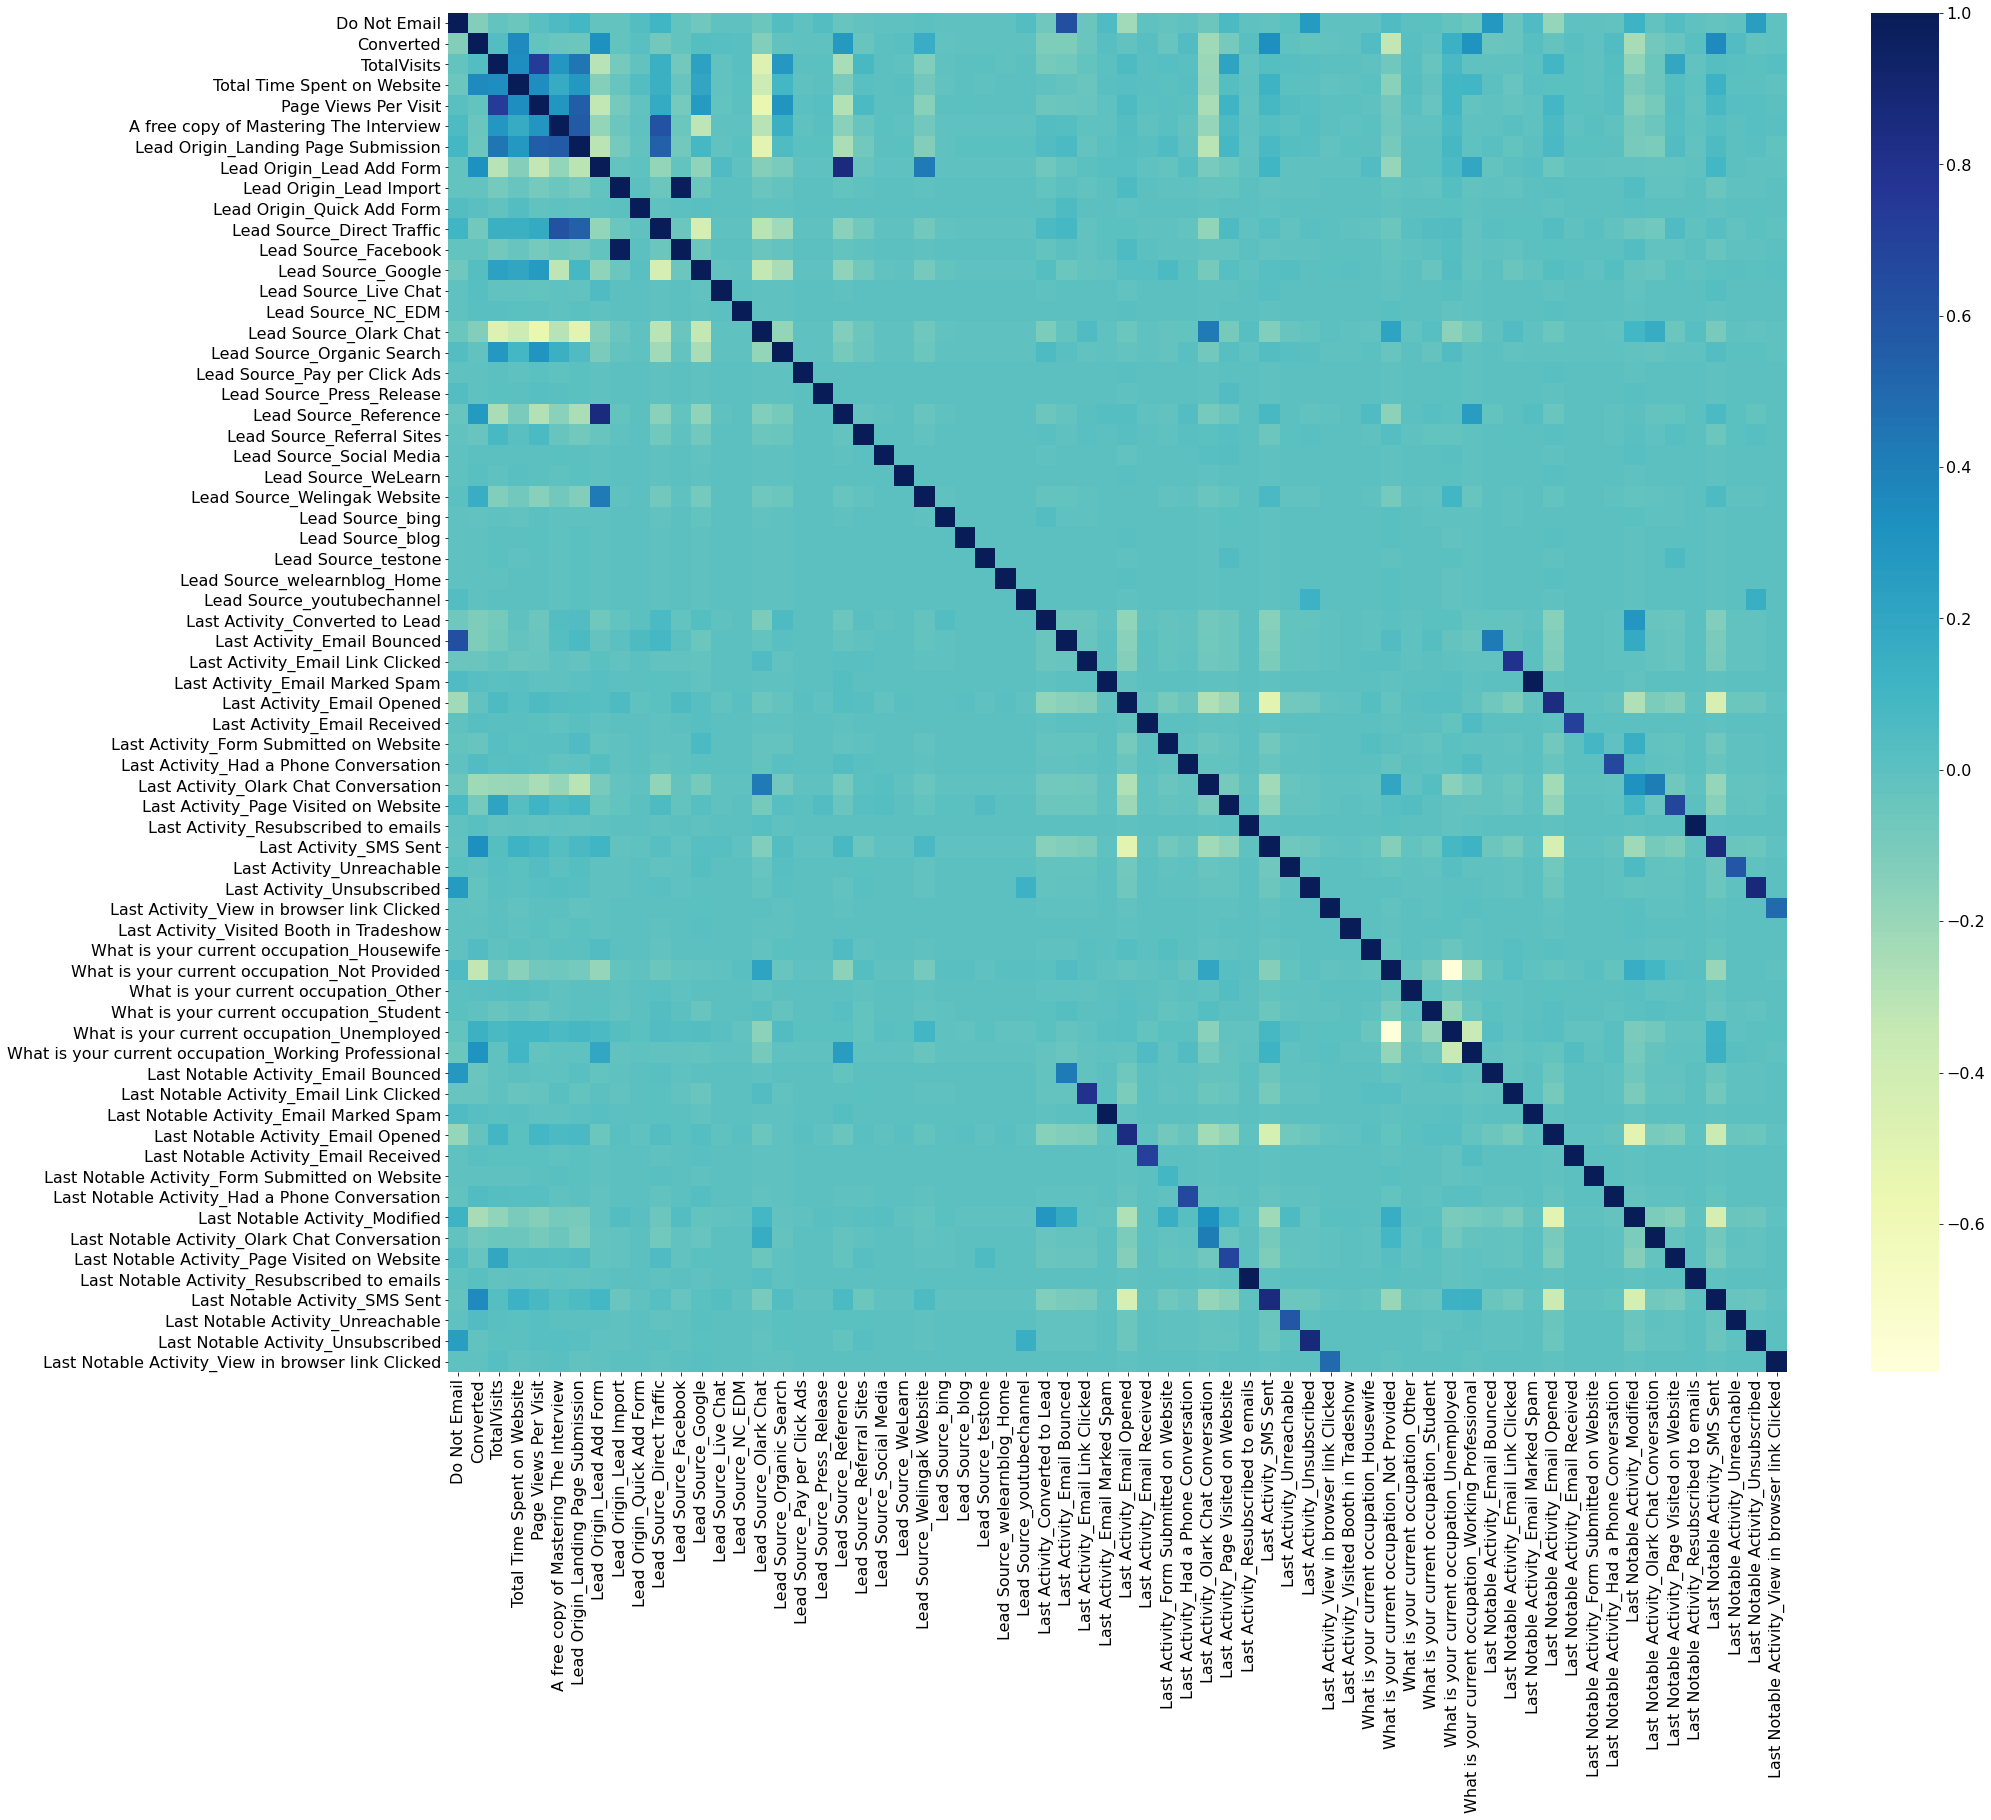

In [68]:
#let's see the correlation matrix
plt.figure(figsize =(30, 25))
sns.heatmap(leads.corr(), cmap = 'YlGnBu')
plt.show()

Since there are a lot a variable, it is difficult to choose a variable to drop. 
We will drop the variables with the help of RFE Selection.

### Step 7: Model Building

#### Running the first training model - Model 1

In [69]:
import statsmodels.api as sm

In [70]:
# Logistic Regression Model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6262
Model Family:                Binomial   Df Model:                           57
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 12 Apr 2022   Deviance:                   1.3981e+05
Time:                        21:07:01   Pearson chi2:                 6.84e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 5.507e+15   5.23e+07   1.05e+08      0.000    5.51e+15    5.51e+15
Do Not Email                                         -2.085e+14   4.55e+06  -4.58e+07      0.000   -2.09e+14   -2.09e+14
TotalVisits                                           4.894e+14   7.54e+06   6.49e+07      0.000    4.89e+14    4.89e+14
Total Time Spent on Website                           1.282e+15   4.03e+06   3.18e+08      0.000    1.28e+15    1.28e+15
Page Views Per Visit                                  2.512e+13   6.36e+06   3.95e+06      0.000    2.51e+13    2.51e+13
A free copy of Mastering The Interview                5.894e+13   2.67e+06   2.21e+07      0.000    5.89e+13    5.89e+13
Lead Origin_Landing Page Submission                  -1.296e+14   2.73e+06  -4.75e+07      0.000    -1.3e+14    -1.3e+14
Lead Origin_Lead Add Form                             1.229e+15   1.33e+07   9.24e+07      0.000    1.23e+15    1.23e+15
Lead Origin_Lead Import                               1.413e+15    4.8e+07   2.95e+07      0.000    1.41e+15    1.41e+15
Lead Origin_Quick Add Form                              30.1732   5.19e-07   5.81e+07      0.000      30.173      30.173
Lead Source_Direct Traffic                            -1.38e+15    4.1e+07  -3.36e+07      0.000   -1.38e+15   -1.38e+15
Lead Source_Facebook                                 -2.067e+15    6.3e+07  -3.28e+07      0.000   -2.07e+15   -2.07e+15
Lead Source_Google                                   -1.353e+15   4.09e+07  -3.31e+07      0.000   -1.35e+15   -1.35e+15
Lead Source_Live Chat                                  1.59e+15   6.13e+07   2.59e+07      0.000    1.59e+15    1.59e+15
Lead Source_NC_EDM                                    3.897e+15   7.86e+07   4.96e+07      0.000     3.9e+15     3.9e+15
Lead Source_Olark Chat                               -1.393e+15   4.11e+07  -3.39e+07      0.000   -1.39e+15   -1.39e+15
Lead Source_Organic Search                           -1.478e+15    4.1e+07   -3.6e+07      0.000   -1.48e+15   -1.48e+15
Lead Source_Pay per Click Ads                          -29.1382   2.46e-07  -1.18e+08      0.000     -29.138     -29.138
Lead Source_Press_Release                            -4.693e+15   7.89e+07  -5.95e+07      0.000   -4.69e+15   -4.69e+15
Lead Source_Reference                                -1.472e+15    3.9e+07  -3.77e+07      0.000   -1.47e+15   -1.47e+15
Lead Source_Referral Sites                           -1.413e+15   4.17e+07  -3.39e+07      0.000   -1.41e+15   -1.41e+15
Lead Source_Social Media                             -2.401e+14   6.28e+07  -3.82e+06      0.000    -2.4e+14    -2.4e+14
Lead Source_WeLearn                                   4.08

### Step 8: Feature Selection Using RFE

In [71]:
#importing RFE and LinearRegression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [72]:
# running RFE with the output number of the variable equal to 15
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [73]:
rfe.support_

array([ True,  True,  True,  True, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True, False, False, False, False,  True,
        True, False, False, False,  True, False, False, False, False,
       False, False,  True,  True, False, False, False, False,  True,
       False, False])

In [74]:
# Checking which parameters which have selected in the list of 15
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 47),
 ('Lead Origin_Landing Page Submission', False, 26),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 45),
 ('Lead Origin_Quick Add Form', False, 49),
 ('Lead Source_Direct Traffic', False, 15),
 ('Lead Source_Facebook', False, 19),
 ('Lead Source_Google', False, 18),
 ('Lead Source_Live Chat', False, 35),
 ('Lead Source_NC_EDM', False, 11),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 16),
 ('Lead Source_Pay per Click Ads', False, 50),
 ('Lead Source_Press_Release', False, 42),
 ('Lead Source_Reference', False, 30),
 ('Lead Source_Referral Sites', False, 17),
 ('Lead Source_Social Media', False, 10),
 ('Lead Source_WeLearn', False, 29),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 40),
 ('Lead Source_blog', Fals

In [75]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Not Provided',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [76]:
# checking which columns have been eleminated
X_train.columns[~rfe.support_]

Index(['A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Page 

#### Model 2

In [77]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6304
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2536.2
Date:                Tue, 12 Apr 2022   Deviance:                       5072.4
Time:                        21:07:10   Pearson chi2:                 6.50e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0445      0.115    -17.828      0.000      -2.269      -1.820
Do Not Email                                            -1.1800      0.168     -7.004      0.000      -1.510      -0.850
TotalVisits                                              1.4033      0.283      4.962      0.000       0.849       1.958
Total Time Spent on Website                              4.5565      0.170     26.787      0.000       4.223       4.890
Page Views Per Visit                                    -0.6960      0.243     -2.861      0.004      -1.173      -0.219
Lead Origin_Lead Add Form                                3.5564      0.215     16.508      0.000       3.134       3.979
Lead Source_Olark Chat                                   1.4647      0.131     11.145      0.000       1.207       1.722
Lead Source_Welingak Website                             2.0935      0.743      2.816      0.005       0.636       3.551
Last Activity_Olark Chat Conversation                   -0.9293      0.170     -5.459      0.000      -1.263      -0.596
Last Activity_SMS Sent                                   1.3014      0.077     16.862      0.000       1.150       1.453
What is your current occupation_Housewife               23.0116   1.71e+04      0.001      0.999   -3.35e+04    3.35e+04
What is your current occupation_Not Provided            -1.1942      0.089    -13.448      0.000      -1.368      -1.020
What is your current occupation_Working Professional     2.3583      0.182     12.958      0.000       2.002       2.715
Last Notable Activity_Had a Phone Conversation           3.3804      1.122      3.012      0.003       1.181       5.580
Last Notable Activity_Modified                          -0.7729      0.083     -9.314      0.000      -0.936      -0.610
Last Notable Activity_Unreachable                        1.7010      0.551      3.088      0.002       0.621       2.781
========================================================================================================================
"""

In [78]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5493    0.067648
8064    0.067439
4716    0.031163
9117    0.358978
2402    0.511130
1796    0.029997
1120    0.029997
253     0.049874
1491    0.116253
2004    0.374480
dtype: float64

In [79]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.06764768, 0.06743939, 0.03116277, 0.35897843, 0.51112971,
       0.02999718, 0.02999718, 0.04987363, 0.11625317, 0.37447974])

In [80]:
# Creating a dataframe with the actual converted and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['ConvertedID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,ConvertedID
0,0,0.067648,5493
1,0,0.067439,8064
2,0,0.031163,4716
3,0,0.358978,9117
4,1,0.511130,2402


In [81]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,ConvertedID,Predicted
0,0,0.067648,5493,0
1,0,0.067439,8064,0
2,0,0.031163,4716,0
3,0,0.358978,9117,0
4,1,0.511130,2402,1


In [82]:
from sklearn import metrics

In [83]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3471  438]
 [ 715 1696]]


In [84]:
# Actual/Predicted  not_converted   converted
# not_cconverted         3471        438
# converted              715        1696  

In [85]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8175632911392405


The accuracy has improved to 82%. 

Let us check the VIFs

In [86]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [87]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,5.32
1,TotalVisits,4.65
2,Total Time Spent on Website,2.01
13,Last Notable Activity_Modified,1.72
5,Lead Source_Olark Chat,1.63
7,Last Activity_Olark Chat Conversation,1.60
10,What is your current occupation_Not Provided,1.53
8,Last Activity_SMS Sent,1.51
4,Lead Origin_Lead Add Form,1.49
6,Lead Source_Welingak Website,1.29


The variable Page Views Per Visit is high i.e >5. It's best to drop this variable as it won't help much with prediction and unnecessarily making the model complex. So let's start by dropping that.

In [88]:
col = col.drop('Page Views Per Visit', 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Housewife',
       'What is your current occupation_Not Provided',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

#### Model 3

In [89]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6305
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2540.3
Date:                Tue, 12 Apr 2022   Deviance:                       5080.6
Time:                        21:07:11   Pearson chi2:                 6.50e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1899      0.103    -21.160      0.000      -2.393      -1.987
Do Not Email                                            -1.1799      0.169     -7.001      0.000      -1.510      -0.850
TotalVisits                                              0.9827      0.242      4.059      0.000       0.508       1.457
Total Time Spent on Website                              4.5542      0.170     26.773      0.000       4.221       4.888
Lead Origin_Lead Add Form                                3.7061      0.209     17.706      0.000       3.296       4.116
Lead Source_Olark Chat                                   1.6090      0.122     13.188      0.000       1.370       1.848
Lead Source_Welingak Website                             2.0932      0.743      2.816      0.005       0.636       3.550
Last Activity_Olark Chat Conversation                   -0.9191      0.170     -5.411      0.000      -1.252      -0.586
Last Activity_SMS Sent                                   1.2781      0.077     16.691      0.000       1.128       1.428
What is your current occupation_Housewife               23.0502    1.7e+04      0.001      0.999   -3.34e+04    3.34e+04
What is your current occupation_Not Provided            -1.1907      0.089    -13.433      0.000      -1.364      -1.017
What is your current occupation_Working Professional     2.3554      0.182     12.950      0.000       1.999       2.712
Last Notable Activity_Had a Phone Conversation           3.3531      1.122      2.988      0.003       1.154       5.553
Last Notable Activity_Modified                          -0.7710      0.083     -9.306      0.000      -0.933      -0.609
Last Notable Activity_Unreachable                        1.6755      0.556      3.016      0.003       0.587       2.764
========================================================================================================================
"""

In [90]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.06626011, 0.06990158, 0.03173491, 0.35873684, 0.47863938,
       0.03042584, 0.03042584, 0.05487714, 0.12303372, 0.36344137])

In [91]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [92]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,ConvertedID,Predicted
0,0,0.066260,5493,0
1,0,0.069902,8064,0
2,0,0.031735,4716,0
3,0,0.358737,9117,0
4,1,0.478639,2402,0


In [93]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.817246835443038


Overall the accuracy hasn't dropped much.

In [94]:
#lets check the vif again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,TotalVisits,2.06
2,Total Time Spent on Website,1.94
12,Last Notable Activity_Modified,1.67
4,Lead Source_Olark Chat,1.60
6,Last Activity_Olark Chat Conversation,1.60
9,What is your current occupation_Not Provided,1.51
3,Lead Origin_Lead Add Form,1.47
7,Last Activity_SMS Sent,1.44
5,Lead Source_Welingak Website,1.29
10,What is your current occupation_Working Profes...,1.19


Looking at the summary of Model 3, we should drop the variable 'What is your current occupation_Housewife' as it has a high p-value and is insignificant.

In [95]:
col = col.drop('What is your current occupation_Housewife', 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent',
       'What is your current occupation_Not Provided',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

#### Model 4

In [96]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6306
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2545.5
Date:                Tue, 12 Apr 2022   Deviance:                       5091.1
Time:                        21:07:12   Pearson chi2:                 6.51e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1778      0.103    -21.092      0.000      -2.380      -1.975
Do Not Email                                            -1.1836      0.168     -7.026      0.000      -1.514      -0.853
TotalVisits                                              0.9702      0.242      4.011      0.000       0.496       1.444
Total Time Spent on Website                              4.5523      0.170     26.793      0.000       4.219       4.885
Lead Origin_Lead Add Form                                3.7035      0.209     17.711      0.000       3.294       4.113
Lead Source_Olark Chat                                   1.6015      0.122     13.142      0.000       1.363       1.840
Lead Source_Welingak Website                             2.0866      0.743      2.807      0.005       0.630       3.543
Last Activity_Olark Chat Conversation                   -0.9223      0.170     -5.431      0.000      -1.255      -0.589
Last Activity_SMS Sent                                   1.2717      0.077     16.622      0.000       1.122       1.422
What is your current occupation_Not Provided            -1.1945      0.089    -13.484      0.000      -1.368      -1.021
What is your current occupation_Working Professional     2.3496      0.182     12.922      0.000       1.993       2.706
Last Notable Activity_Had a Phone Conversation           3.3464      1.122      2.982      0.003       1.147       5.546
Last Notable Activity_Modified                          -0.7718      0.083     -9.327      0.000      -0.934      -0.610
Last Notable Activity_Unreachable                        1.6694      0.556      3.005      0.003       0.580       2.758
========================================================================================================================
"""

In [97]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.06685742, 0.07047813, 0.03157474, 0.35977209, 0.48030157,
       0.03032549, 0.03032549, 0.05513351, 0.12287394, 0.36438599])

In [98]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [99]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,ConvertedID,Predicted
0,0,0.066857,5493,0
1,0,0.070478,8064,0
2,0,0.031575,4716,0
3,0,0.359772,9117,0
4,1,0.480302,2402,0


In [100]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8169303797468355


Overall the accuracy hasn't dropped much.

In [101]:
#lets check the vif again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,TotalVisits,2.06
2,Total Time Spent on Website,1.94
11,Last Notable Activity_Modified,1.67
4,Lead Source_Olark Chat,1.60
6,Last Activity_Olark Chat Conversation,1.60
8,What is your current occupation_Not Provided,1.51
3,Lead Origin_Lead Add Form,1.47
7,Last Activity_SMS Sent,1.44
5,Lead Source_Welingak Website,1.29
9,What is your current occupation_Working Profes...,1.19


All variables have a good value of VIF and the p-values are within the range. So we need not drop any more variables and we can proceed with making predictions using this model only.

In [102]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3471,  438],
       [ 719, 1692]], dtype=int64)

In [103]:
# Actual/Predicted  not_converted   converted
# not_converted          3471        438
# converted              719        1692  

In [104]:
# Let's check the overall accuracy once again.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8169303797468355


#### Metrics beyond simply accuracy

In [105]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [106]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7017834923268353

In [107]:
# Let us calculate specificity
TN / float(TN+FP)

0.8879508825786646

In [108]:
# Calculate false postive rate - predicting conversion when customer has not converted
print(FP/ float(TN+FP))

0.11204911742133537


In [109]:
# positive predictive value 
print (TP / float(TP+FP))

0.7943661971830986


In [110]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8284009546539379


### Step 9: Plotting the ROC curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [111]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5,5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [112]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False)

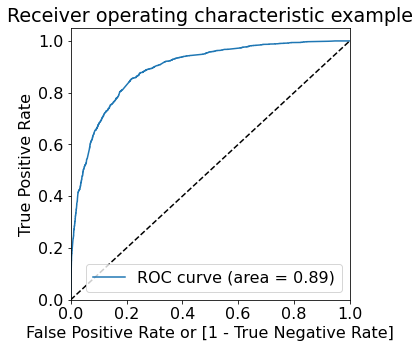

In [113]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [114]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,ConvertedID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.066857,5493,0,1,0,0,0,0,0,0,0,0,0
1,0,0.070478,8064,0,1,0,0,0,0,0,0,0,0,0
2,0,0.031575,4716,0,1,0,0,0,0,0,0,0,0,0
3,0,0.359772,9117,0,1,1,1,1,0,0,0,0,0,0
4,1,0.480302,2402,0,1,1,1,1,1,0,0,0,0,0


In [115]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381487  1.000000  0.000000
0.1   0.1  0.645253  0.967234  0.446662
0.2   0.2  0.760443  0.919950  0.662062
0.3   0.3  0.800316  0.865201  0.760297
0.4   0.4  0.813766  0.772708  0.839089
0.5   0.5  0.816930  0.701783  0.887951
0.6   0.6  0.810918  0.633762  0.920184
0.7   0.7  0.784177  0.513895  0.950883
0.8   0.8  0.762025  0.429697  0.966999
0.9   0.9  0.717880  0.281211  0.987209


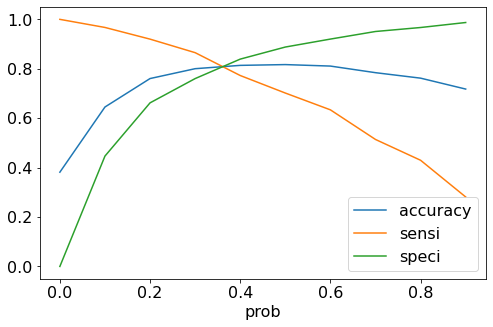

In [116]:
# Let's plot accuracy, sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(8,5))
plt.show()

#### From the curve above, 0.37 is the optimum point to take it as a cutoff probability.

In [117]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.37 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,ConvertedID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.066857,5493,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.070478,8064,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.031575,4716,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.359772,9117,0,1,1,1,1,0,0,0,0,0,0,0
4,1,0.480302,2402,0,1,1,1,1,1,0,0,0,0,0,1


In [118]:
# Let's check the overall accuracy.
accuracy_train = round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)*100,2)
accuracy_train

81.52

In [119]:
confusion_train = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion_train

array([[3208,  701],
       [ 467, 1944]], dtype=int64)

In [120]:
TP = confusion_train[1,1] # true positive 
TN = confusion_train[0,0] # true negatives
FP = confusion_train[0,1] # false positives
FN = confusion_train[1,0] # false negatives

In [121]:
# Let's see the sensitivity of our logistic regression model
sensitivity_train = round((TP / float(TP+FN))*100,2)
sensitivity_train

80.63

In [122]:
# Let us calculate specificity
specificity_train = round((TN / float(TN+FP))*100,2)
specificity_train

82.07

In [123]:
# Calculate false postive rate - predicting conversion when customer has not converted
print(FP/ float(TN+FP))

0.1793297518546943


In [124]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7349716446124763


In [125]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8729251700680272


#### Looking at Precision and recall

In [126]:
precision_train = round((confusion_train[1,1]/(confusion_train[0,1]+confusion_train[1,1]))*100,2)
precision_train

73.5

In [127]:
recall_train = round((confusion_train[1,1]/(confusion_train[1,0]+confusion_train[1,1]))*100,2)
recall_train

80.63

In [128]:
from sklearn.metrics import precision_recall_curve

In [129]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

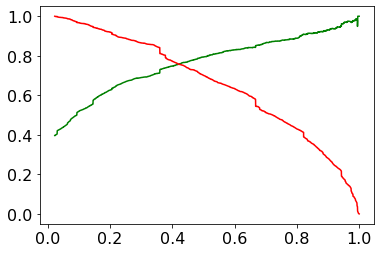

In [130]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making Predictions on the test set

In [131]:
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

In [132]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Not Provided,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Unreachable
4664,0,0.0000,0.000000,0,1,0,0,0,0,0,0,0,0
5394,0,0.2500,0.072183,0,1,0,0,0,1,0,0,1,0
1595,0,0.2500,0.515405,0,0,0,0,0,0,1,0,1,0
2111,0,0.4375,0.229754,0,0,0,0,0,1,0,0,0,0
9182,0,0.0000,0.000000,0,1,0,0,1,0,0,0,1,0


In [133]:
X_test_sm = sm.add_constant(X_test)

In [134]:
y_test_pred = res.predict(X_test_sm)

In [135]:
y_test_pred[:10]

4664    0.359772
5394    0.122222
1595    0.879612
2111    0.129883
9182    0.480907
1055    0.684857
541     0.078591
446     0.987570
3728    0.018951
4249    0.007712
dtype: float64

In [136]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [137]:
# Let's see the head
y_pred_1.head()

,0
4664,0.359772
5394,0.122222
1595,0.879612
2111,0.129883
9182,0.480907


In [138]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [139]:
# Putting CustID to index
y_test_df['ConvertedID'] = y_test_df.index

In [140]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [141]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [142]:
y_pred_final.head()

,Converted,ConvertedID,0
0,0,4664,0.359772
1,0,5394,0.122222
2,1,1595,0.879612
3,0,2111,0.129883
4,0,9182,0.480907


In [143]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [144]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['ConvertedID','Converted','Converted_Prob'], axis=1)

In [145]:
# Let's see the head of y_pred_final
y_pred_final.head()

,ConvertedID,Converted,Converted_Prob
0,4664,0,0.359772
1,5394,0,0.122222
2,1595,1,0.879612
3,2111,0,0.129883
4,9182,0,0.480907


In [146]:
y_pred_final['Final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.37 else 0)

In [147]:
y_pred_final.head()

,ConvertedID,Converted,Converted_Prob,Final_predicted
0,4664,0,0.359772,0
1,5394,0,0.122222,0
2,1595,1,0.879612,1
3,2111,0,0.129883,0
4,9182,0,0.480907,1


In [148]:
# Let's check the overall accuracy.
accuracy_test = round(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_predicted)*100,2)
accuracy_test

81.25

In [149]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_predicted )
confusion_test

array([[1339,  304],
       [ 204,  862]], dtype=int64)

In [150]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [151]:
# Let's see the sensitivity of our logistic regression model
sensitivity_test = round((TP / float(TP+FN))*100,2)
sensitivity_test

80.86

In [152]:
# Let us calculate specificity
specificity_test = round((TN / float(TN+FP))*100,2)
specificity_test

81.5

In [153]:
precision_test = round((confusion_test[1,1]/(confusion_test[0,1]+confusion_test[1,1]))*100,2)
precision_test

73.93

In [154]:
recall_test = round((confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1]))*100,2)
recall_test

80.86

#### Metrics Comparison between Train data set and Test data set

In [155]:
print('Train Data Set metrics:')
print('Sensitivity:',sensitivity_train)   
print('Specificity:',specificity_train)
print('Precision:',precision_train) 
print('Recall:',recall_train)
print('Accuracy:',accuracy_train)
print()
print('Test Data Set metrics:')
print('Sensitivity:',sensitivity_test)   
print('Specificity:',specificity_test)
print('Precision:',precision_test) 
print('Recall:',recall_test)
print('Accuracy:',accuracy_test)

Train Data Set metrics:
Sensitivity: 80.63
Specificity: 82.07
Precision: 73.5
Recall: 80.63
Accuracy: 81.52

Test Data Set metrics:
Sensitivity: 80.86
Specificity: 81.5
Precision: 73.93
Recall: 80.86
Accuracy: 81.25


### Lead Score

In [156]:
y_pred_final['Lead_Score'] = (y_pred_final['Converted_Prob']*100).astype("int64")
y_pred_final.sort_values(by='Lead_Score', ascending = False)

,ConvertedID,Converted,Converted_Prob,Final_predicted,Lead_Score
1239,5791,1,0.994217,1,99
677,7187,1,0.997027,1,99
1357,8108,1,0.994217,1,99
2600,8073,1,0.994217,1,99
2283,2042,1,0.994217,1,99
...,...,...,...,...,...
2464,6588,0,0.009587,0,0
1594,1815,0,0.007582,0,0
962,1073,0,0.008454,0,0
2076,665,0,0.006511,0,0


#### Conclusion 

- The top three variables that contribute towards lead conversion are Total Time Spent on Website, Lead Origin - Lead Add Form and Last Notable Activity - Had a Phone Conversation. 
- The conversion rate on the original dataset was 39%. 
- Now, after building the model and applying it on the test dataset, the conversion rate as per the metrics of Accuracy, Sensitivity and Specificity is around 80%.
- Since the conversion rate has increased to 80% we can say that the model is well built.

Some strategies that X Education should employ can be as follows:
- They should make the website more interesting since the total time spent on the websites by the leads is the main variable that will help in conversion.
- The origin of the leads from Lead Add Form should be given more priority since they have higher chances of conversion as compared to the other lead origins.
- The leads having their last notable activity as a Phone Conversation should be given more preference as they have a better conversion rate.